# College Prediction

### K Means Clustering Project 

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Get the Data

In [149]:
df = pd.read_csv('https://raw.githubusercontent.com/fatemearyaie/college-Prediction/main/Collage.csv')

In [110]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [112]:
df.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [113]:
df['private'] = df['private'].map({'Yes':1, 'No':0})

In [114]:
df.isna().sum()

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

## Exploratory Data Analysis (EDA)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


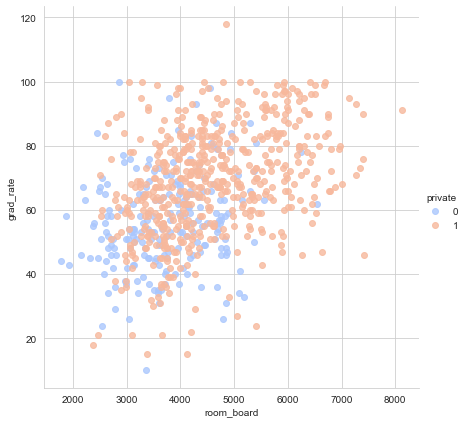

In [115]:
sns.set_style('whitegrid')
sns.lmplot('room_board','grad_rate',data=df,hue='private',height=6,aspect=1,palette='coolwarm',fit_reg=False)

<AxesSubplot:xlabel='room_board', ylabel='grad_rate'>

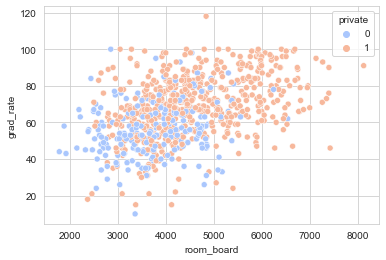

In [116]:
sns.scatterplot(x='room_board',y='grad_rate',data=df,hue='private',palette='coolwarm')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


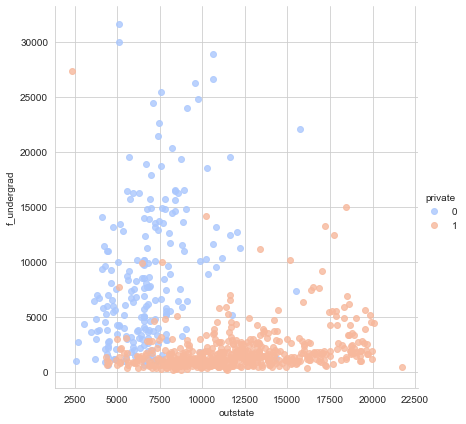

In [117]:
sns.set_style('whitegrid')
sns.lmplot('outstate','f_undergrad',data=df,hue='private',height=6,aspect=1,palette='coolwarm',fit_reg=False)

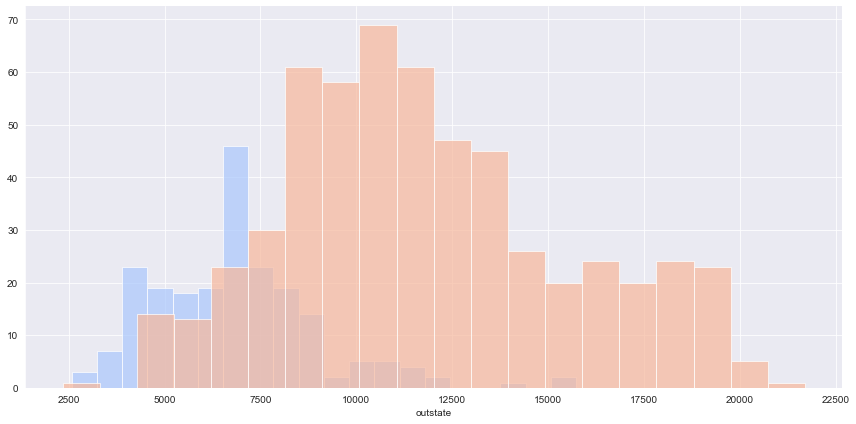

In [118]:
sns.set_style('darkgrid')
facet = sns.FacetGrid(df,hue='private',palette='coolwarm',height=6,aspect=2)
facet = facet.map(plt.hist,'outstate',bins=20,alpha=0.7)

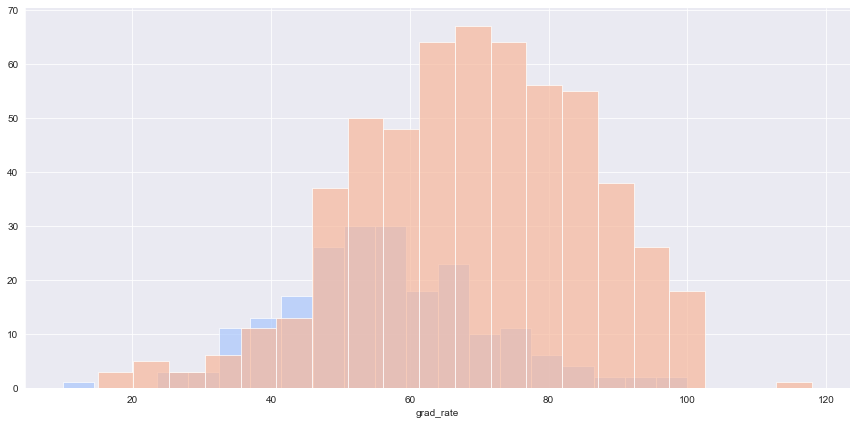

In [119]:
sns.set_style('darkgrid')
facet = sns.FacetGrid(df,hue='private',palette='coolwarm',height=6,aspect=2)
facet = facet.map(plt.hist,'grad_rate',bins=20,alpha=0.7)

In [120]:
df[df['grad_rate']>100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,1,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [121]:
df[df['grad_rate']>100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,1,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


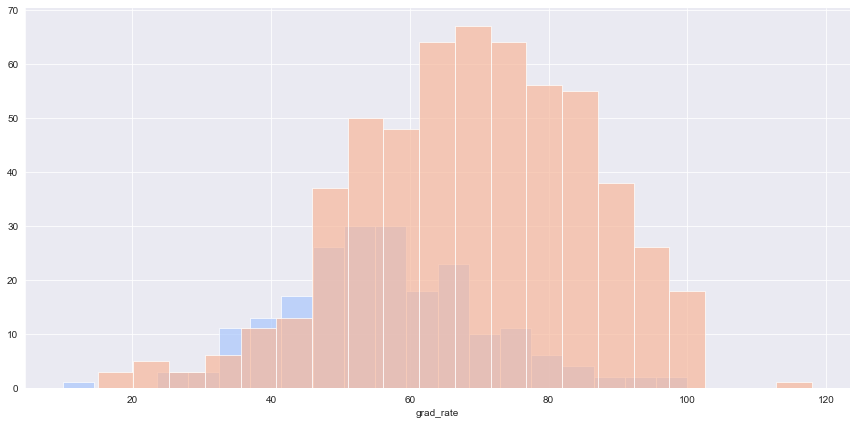

In [122]:
sns.set_style('darkgrid')
facet = sns.FacetGrid(df,hue='private',palette='coolwarm',height=6,aspect=2)
facet = facet.map(plt.hist,'grad_rate',bins=20,alpha=0.7)

## K Means Cluster Creation

In [123]:
from sklearn.cluster import KMeans

In [124]:
kmeans = KMeans(n_clusters=2)

In [125]:
kmeans.fit(df.drop('private',axis=1))

KMeans(n_clusters=2)

In [126]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Evaluation

In [127]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [129]:
kmeans.predict(df.drop('private',axis=1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [130]:
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0

In [132]:
df['CLuster'] = df['private'].apply(converter)

In [133]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,CLuster
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [134]:
from sklearn.metrics import confusion_matrix,classification_report

In [135]:
print(confusion_matrix(df['CLuster'],kmeans.labels_))

[[669 108]
 [  0   0]]


In [136]:
print(classification_report(df['CLuster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       777
           1       0.00      0.00      0.00         0

    accuracy                           0.86       777
   macro avg       0.50      0.43      0.46       777
weighted avg       1.00      0.86      0.93       777



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div style="direction:rtl">
خب خیلیم بد نیست، مدل شما تونسته دانشگاه ها رو بر اساس ویژگی های دانشجوهاش مثل میانگین نمره و این چیزا به دو دسته ی دولتی و خصوصی تقسیم کنه، اونم بدون این که بدونه کدوم داده ها مربوط به چه کلاسین. اما حالا داده ها رو اسکیل کنید و دوباره این کار رو انجام بدید.

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler = StandardScaler()

In [139]:
scaler.fit(df.drop(['private','CLuster'],axis=1))

StandardScaler()

In [140]:
data_scaled = scaler.transform(df.drop(['private','CLuster'],axis=1))

In [141]:
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [142]:
from sklearn.metrics import confusion_matrix,classification_report

In [143]:
print(confusion_matrix(df['CLuster'],kmeans.labels_))

[[291 486]
 [  0   0]]


In [144]:
print(classification_report(df['CLuster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54       777
           1       0.00      0.00      0.00         0

    accuracy                           0.37       777
   macro avg       0.50      0.19      0.27       777
weighted avg       1.00      0.37      0.54       777



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div style="direction:rtl">
خب دیدیم که توی الگوریتم های مبتنی بر محاسبه ی فاصله، چقدر اسکیل کردن داده ها می تونه موثر باشه و درصد امتیاز ما رو از 10 به 65 ارتقا بده. اما حالا به کمک سیلوهت اسکور بررسی کنید که اگه قرار بود دسته بندی دقیق تری برای دانشگاه ها می داشتیم، اصولا تقسیم بندی دانشگاه ها به چند دسته کار بهتری بود؟

In [145]:
from sklearn.metrics import silhouette_score

In [146]:
def optimal_kmeans(dataset,normalized_dataset,start=2,end=11):
    n_clu = []
    km_ss = []
    for n_clusters in range(start,end):
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(normalized_dataset)
        silhouette_avg = round(silhouette_score(dataset,labels,random_state=1),3)
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        print('NO.Clusters : {}   ,Silhouette Score : {}'.format(n_clusters,silhouette_avg))
    if n_clusters == end -1 :
        plt.figure(figsize=(6.47,3))
        plt.title('Silhouette Score')
        sns.pointplot(x=n_clu,y=km_ss)

NO.Clusters : 4   ,Silhouette Score : 0.211
NO.Clusters : 5   ,Silhouette Score : 0.2
NO.Clusters : 6   ,Silhouette Score : 0.129
NO.Clusters : 7   ,Silhouette Score : 0.102
NO.Clusters : 8   ,Silhouette Score : 0.156
NO.Clusters : 9   ,Silhouette Score : 0.098
NO.Clusters : 10   ,Silhouette Score : 0.088
NO.Clusters : 11   ,Silhouette Score : 0.054
NO.Clusters : 12   ,Silhouette Score : 0.058
NO.Clusters : 13   ,Silhouette Score : 0.053
NO.Clusters : 14   ,Silhouette Score : 0.05
NO.Clusters : 15   ,Silhouette Score : 0.044
NO.Clusters : 16   ,Silhouette Score : 0.013
NO.Clusters : 17   ,Silhouette Score : 0.023
NO.Clusters : 18   ,Silhouette Score : 0.022
NO.Clusters : 19   ,Silhouette Score : 0.001


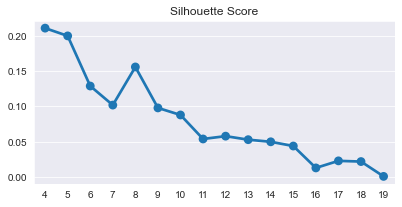

In [148]:
optimal_kmeans(df.drop(['private','CLuster'],axis=1),data_scaled,4,20)